# Assignment #6

# 1. K-means from scratch (30 points)

Code up the K-means algorithm. To test your code, use both the two bivariate Gaussian distributions as well as the initial centroids defined below. After predicting the cluster to which each data point belongs, make a scatter plot of the predicted cluster for each data point. For consistency, set the random seed to 1 before sampling from the two bivariate Gaussian distributions.

* Bivariate Gaussians
$$\mathbf{\mu_1} = \begin{bmatrix}
1.0\\
0.1\\
\end{bmatrix}$$

$$\mathbf{\mu_2} = \begin{bmatrix}
-5.0\\
2.0\\
\end{bmatrix}$$

$$\mathbf{\Sigma_1} = \mathbf{\Sigma_2} = \begin{bmatrix}
1.0&0.2\\
0.2&1.0\\
\end{bmatrix}$$

* Initial centroids:
$$\mathbf{c_1} = \begin{bmatrix}
0.4\\
0.3\\
\end{bmatrix}$$

$$\mathbf{c_2} = \begin{bmatrix}
0.1\\
0.4\\
\end{bmatrix}$$
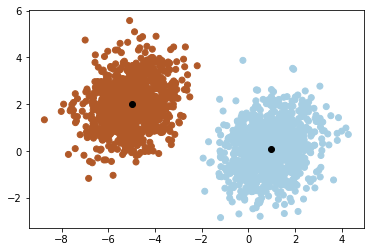

# 2. Find the optimal K  (50 pts)

In this problem you wil find the minimum number of clusters ($k$) that is necessary to ensure the maps reproduced from the K-means centroid values fall within a pre-defined performance criteria. 

1. Subset and regrid the datasets below by extracting the bounding box minlat=39.0, minlon=-106.5, maxlat=41.0, maxlon=-104.5 and upscaling the data to a 0.01 arcdegree spatial resolution using -r average.

    * **Annual mean precipitation (mm/year)** - */data/PRISM/PRISM_ppt_30yr_normal_800mM2_annual/PRISM_ppt_30yr_normal_800mM2_annual_bil.bil*
    * **Annual mean temperature (C)** - */data/PRISM/PRISM_tmean_30yr_normal_800mM2_annual/PRISM_tmean_30yr_normal_800mM2_annual_bil.bil*
    * **Elevation (m)** - */data/NED/NED.vrt ../Workspace/dem.tif*
    * **Sand (%)** - */data/POLARIS/sand_0_5.vrt*
    * **Soil porosity (%)** - */data/POLARIS/porosity_0_5.vrt*
    * **Saturated hydraulic conductivity (cm/hr)** - */data/POLARIS/ksat_0_5.vrt*
    * **Bare cover fraction (%)** - */data/USGS30m/bare2010/bare2010.vrt*
    * **Tree cover fraction (%)** - */data/USGS30m/treecover2010/treecover2010.vrt*
    
    
2. Construct an algorithm that computes the minimum number of clusters necessary to ensure that the maps reproduced using the K-means computed centroids all have a KGE $\geq$ 0.75. Report the optimal number of clusters. To ensure the results are reproduceable, set the random seed to 1.

> The KGE is Kling Gupta Efficieny metric is defined as:

$$\text{KGE} = 1 - \sqrt{(\rho-1)^2 + (\frac{\sigma_{org}}{\sigma_{sim}} - 1)^2 + (\frac{\mu_{org}}{\mu_{sim}} - 1)^2}$$

> Where $\rho$ is the Pearson correlation between the original and simulated maps, $\sigma_x$ is the standard deviation of a given map, and $\mu_x$ is the arithmetic mean of a given map.

3. Repeat the previous exercise, except this time use Principal Component Analysis to first whiten the input data before applying K-means. After clustering and before comparing to the original maps, remember to use the inverse transform. 

4. Describe the difference in the results between parts 2 and 3. What are the advantages/disadvantages of whitening the data? 

5. Explain why in both parts 2 and 3 the relationship between the increase of the number of clusters and the KGE metric is not monotonically increasing.

# 3. Choose the right clustering approach (20 points)

The file `/data/HydroLakes/watermask_46.4_46.5_-96_-95.9.tif` is a map of lakes in the bounding box minlon = -96, maxlon = -95.9, minlat = 46.4, and maxlat = 46.5 at a 30 meter spatial resolution. All pixels that belong to a lake are assigned 1 while every pixel that is not part of a lake is set to 0. In this problem we will use cluster analysis to group together contiguous pixels to uniquely define all the lakes in the map. 

1. After reading in and preprocessing the data for use in cluster analysis, use the following cluster algorithms with the given associated parameters to cluster the data:


    * Agglomerative Clustering with single linkage (n_clusters=25)
    * DBSCAN (eps = 5, min_samples = 10)
    * K-Means (n_clusters = 25)
    * Gaussian Mixture Model (n_components = 25)


2. Provide a scatter plot of the results of each algorithm. The color of each point on the scatter plot should be associated with a cluster. 


3. Discuss the results with an emphasis on explaining the strengths and deficiencies of each algorithm in the context of clustering the lakes. 


4. Having aseembled the clusters, compute and report the mean and standard deviation of the area of the 25 lakes. 